##  Estudo Estatístico sobre Jogadores de Basquete


### Integrantes:
- Gabriel Rocha Porto
- Victor Marques 
- Pedro Ernesto
- Jeová Anderson


### Introdução: 
Este projeto foi desenvolvido como parte da matéria de Introdução a Ciência de Dados. O conjunto de dados que abrange informações sobre jogadores da NBA(liga americana de basquete) no período de 1996 a 2022. O conjunto de dados inclui estatísticas variadas, como média de pontos, taxa de assistências, taxas de rebotes, taxas de bloqueios, entre outros. Utilizamos técnicas de análise de dados e visualização para extrair insights valiosos e responder a perguntas relevantes relacionadas ao desempenho dos jogadores na liga de basquete mais prestigiada do mundo.




### Dados usados:
Utilizamos o dataset [NBA Players](https://www.kaggle.com/datasets/justinas/nba-players-data/) do kaggle, originalmente os dados são de 1996 até 2022. O conjunto de dados inclui uma variedade de informações, como idade, altura, peso e local de nascimento, detalhes biográficos como a equipe jogada, ano e rodada do draft. Além disso, ele tem estatísticas básicas de pontuação como jogos jogados, média de pontos, rebotes, assistências, etc..

In [101]:
#Importando bibliotecas necessarias e escolhendo paleta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import combinations
from scipy.stats import linregress


# Remoção de Warnings apenas para fins estéticos do Notebook
import warnings
warnings.filterwarnings('ignore')

In [117]:
pallete = ["#F2790F", "#F24405", "#BF2604", "#590202", "#0D0D0D"] 
palleteInv = ["#0D0D0D", "#590202", "#BF2604", "#F24405", "#F2790F"] 
sns.set_palette(pallete)

In [103]:
#Inicializando o Dataset

df = pd.read_csv("all_seasons.csv")
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,19,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


## Sumário

+ player_name: **Nome do jogador**
+ team_abbreviation: **Abreviação do nome do time**
+ age: **Idade do jogador**
+ player_height: **Altura (cm)**
+ player_weight: **Peso (kg)**
+ college: **Universidade frequentada**
+ country: **País de origem**
+ draft_year: **Ano que o jogador foi escolhido no _draft_**
+ draft_round: **Rodada do _draft_ que foi escolhido**
+ draft_number: **Posição no _draft_**
+ gp: **Jogos jogados**
+ pts: **Média de pontos**
+ reb: **Média de rebotes pegos**
+ ast: **Média de assistências**
+ net_rating: **Rendimento da equipe a cada 100 posses**
+ oreb_pct: **Porcentagem de rebotes agressivos que o jogador pegou**
+ dreb_pct: **Porcentagem de rebotes defensivos que o jogador pegou**
+ usg_pct: **Porcentagem de jogadas em equipe feitas pelo jogador**
+ ts_pct: **Medida de eficiência no arremesso**
+ ast_pct: **Porcentagem de assistências que resultaram em cesta**
+ season: **Temporada da NBA**

## Pré Processamento:
### Limpeza dos dados:

- **Retirada a coluna "Unnamed: 0"**

In [104]:
df = df.drop(columns="Unnamed: 0")

- **Arredendondo o número de casas decimais do peso dos jogadores para .2.**

In [105]:
df['player_weight'] = df['player_weight'].apply(round, ndigits=2)


- **Dataset após limpeza**:

In [106]:
df.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.80,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.18,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.42,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.06,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.75,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


## Perguntas:

### Jogadores com posições melhores no draft tiveram uma maior média de pontos? ###

In [107]:
dfDraft = df
dfDraft = dfDraft[dfDraft["draft_number"] != "Undrafted"].reset_index()

def toInt(x):
  return int(x)

dfDraft["draft_number"] = dfDraft["draft_number"].apply(toInt)
dfDraft = dfDraft[dfDraft["draft_number"] <= 60]

In [108]:
# Jogadores do Top 10 do Draft tem uma média de pontos por jogo 2.3x maior que jogadores do Bottom 10 do Draft
print(dfDraft["pts"][(dfDraft["draft_number"] <= 10)].mean())
print(dfDraft["pts"][(dfDraft["draft_number"] >= 50)].mean())


12.43633239612621
5.40187074829932


In [109]:
dfDraft['Draft_Group'] = (dfDraft['draft_number']) // 10
dfDraft['Draft_Group'] = dfDraft['Draft_Group'].clip(upper=(dfDraft['draft_number'].max() - 1) // 10)

<Axes: xlabel='Draft_Group', ylabel='pts_mean_by_draft'>

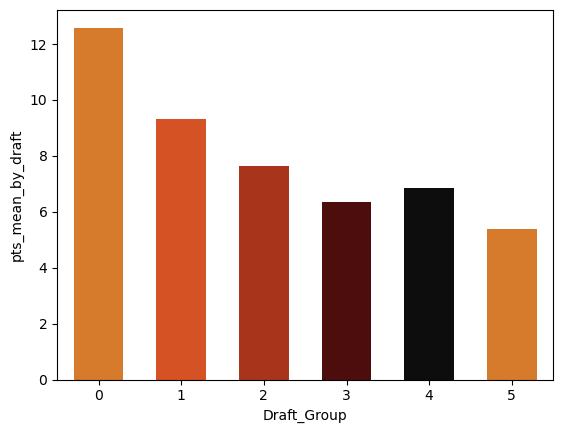

In [110]:
dfhandle = dfDraft.groupby("Draft_Group")["pts"].mean()
dfDraft['pts_mean_by_draft'] = dfDraft['Draft_Group'].map(dfhandle)
sns.barplot(dfDraft, x="Draft_Group", y="pts_mean_by_draft", dodge=True, width=0.6,palette=pallete)

In [111]:
#Existe correlação que quanto menor for a posição no draft, maior será a média de pontos

dfDraft['draft_number'].corr(dfDraft["pts"])

-0.3799120086627798

### Jogadores acima de 35 anos jogam menos partidas que os mais novos? ### 

- **Separando entre jogadores abaixo de 35 anos e jogadores com idades maiores ou iguais a 35 anos**

In [112]:
older_players = df[df['age'] >= 35]
younger_players = df[df['age'] < 35]

avg_gp_older = older_players['gp'].mean()
avg_gp_younger = younger_players['gp'].mean()

print(f"Média de partidas jogadas por jogadores com 35 anos ou mais: {avg_gp_older}")
print(f"Média de partidas jogadas por jogadores com menos de 35 anos: {avg_gp_younger}")


Média de partidas jogadas por jogadores com 35 anos ou mais: 50.53544303797468
Média de partidas jogadas por jogadores com menos de 35 anos: 51.194707151153146


- **Plotando o grafico** 

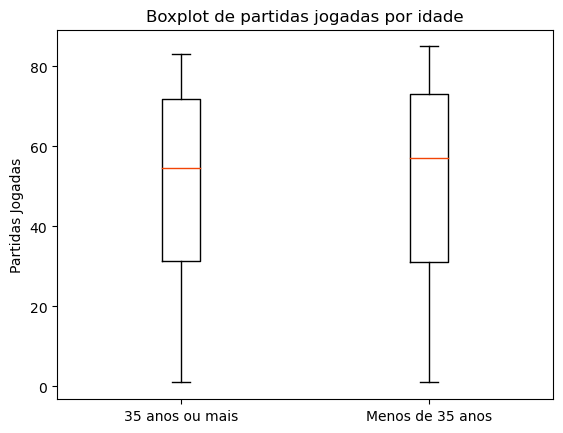

In [113]:
plt.boxplot([older_players['gp'], younger_players['gp']], labels=['35 anos ou mais', 'Menos de 35 anos'])
plt.title('Boxplot de partidas jogadas por idade')
plt.ylabel('Partidas Jogadas')
plt.show()

### Existe diferença de resultados em jogadores com portes físicos diferentes?

- **Agrupamento de jogadores utilizando K-means**

É possível notar uma relação de que quanto maior a altura dos atletas, maior tende a ser o seu peso. Assim, é possível inferir que atletas mais altos e pesados tenham resultados diferentes de atletas mais baixos e leves? 

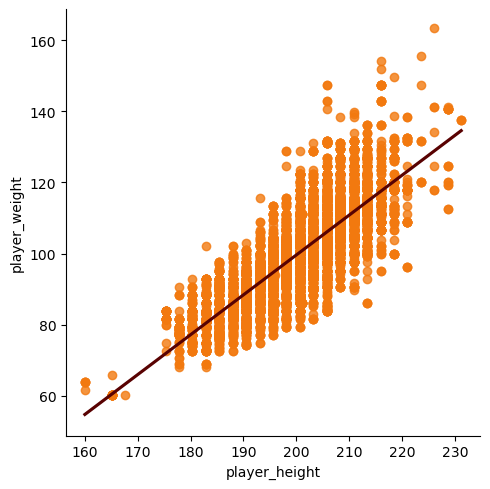

In [114]:
result = linregress(df["player_height"], df["player_weight"])
sns.lmplot(data=df, x="player_height", y="player_weight", line_kws={'color':'#590202'})

Para entender melhor, iremos separar os jogadores em 2 grupos: O Grupo 1 é composto de jogadores mais leves e baixos e o Grupo 2 é composto de jogadores mais altos e pesados. Também é possível realizar essa divisão em 3 grupos revelando um grupo entre os 2 já citados que seria composto de jogadores com altura e peso mais equilibrados

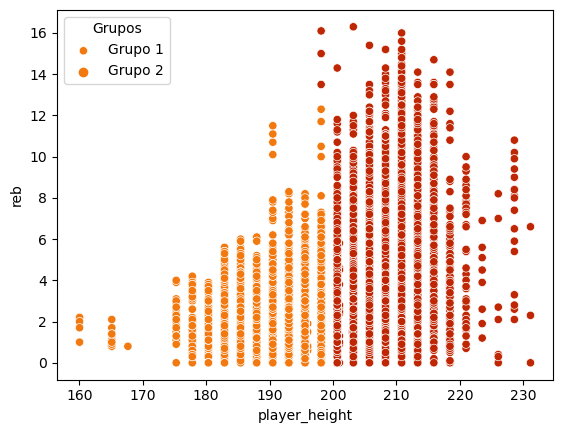

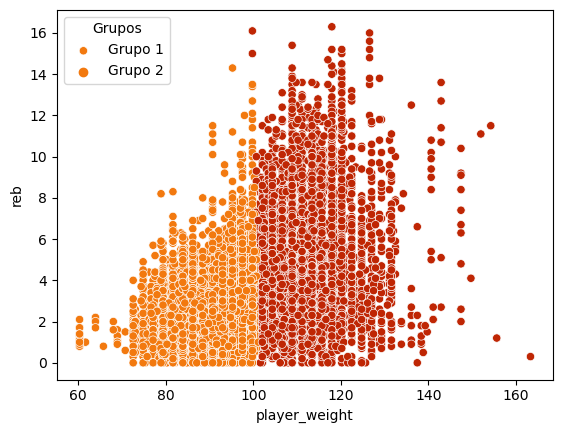

In [151]:
scPallet = ["#F2790F", "#BF2604"]
scPallet2 = ["#BF2604", "#F2790F"]


kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(df[["player_height", "reb"]])

sns.scatterplot(data=df, x="player_height", y="reb",palette=scPallet, hue=kmeans.labels_)
plt.legend(labels=["Grupo 1", "Grupo 2"], title="Grupos")
plt.show()

kmeans.fit(df[["player_weight", "reb"]])
sns.scatterplot(data=df, x="player_weight", y="reb",palette=scPallet, hue=kmeans.labels_)
plt.legend(labels=["Grupo 1", "Grupo 2"], title="Grupos")
plt.show()

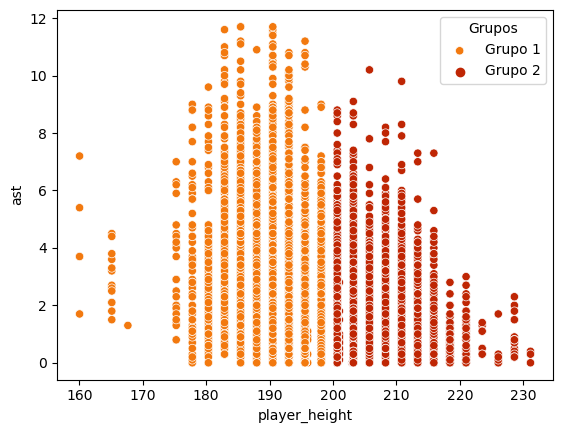

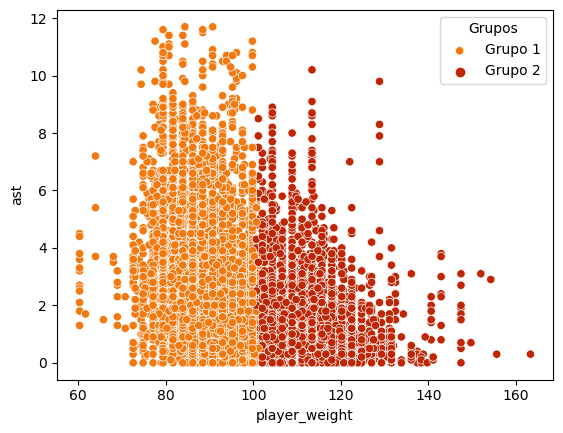

In [155]:
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(df[["player_height", "reb"]])
sns.scatterplot(data=df, x="player_height", y="ast",palette=scPallet2,hue=kmeans.labels_)
plt.legend(labels=["Grupo 1", "Grupo 2"], title="Grupos")
plt.show()

kmeans.fit(df[["player_weight", "reb"]])
sns.scatterplot(data=df, x="player_weight", y="ast",palette=scPallet2,hue=kmeans.labels_)
plt.legend(labels=["Grupo 1", "Grupo 2"], title="Grupos")
plt.show()

É possível analisar então que jogadores do Grupo 1 tendem a ter uma taxa de rebotes maior que os jogadores do outro grupo, mas a situação se inverte quando olhamos para a taxa de assistências na qual o Grupo 2 demonstra uma vantagem.

## Conclusão: ##